In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
houses = ['A', 'B', 'C']
xtype_dict = {'r':'raw', 'c':'change','l':'last'}

### Naive Bayes Function

In [75]:
def read_data(house, xtype):
    assert house in houses
    assert xtype in xtype_dict
    
    act_df = pd.read_csv("data/house{}_act.csv".format(house))
    sensor_df = pd.read_csv("data/house{}_sensor.csv".format(house))
    X = np.load("data/X_{}_house{}.npy".format(xtype_dict[xtype], house))
    Y = np.load("data/Y_house{}.npy".format(house))
    miu = np.load("data/mu{}_{}.npy".format(house, xtype))
    prior = np.load('data/Prior_{}.npy'.format(house))
    return act_df, sensor_df, X, Y, miu, prior

In [76]:
def max_posterior(mu, X, prior):
    num_time = len(X)
    num_act = len(mu)
    prob = np.zeros((num_time, num_act))
    for i in range(num_time):
        sensor = X[i]
        for j in range(num_act):
            act = mu[j]
            logp = 0
            for k,s in enumerate(sensor):
                if s == 1.:
                    logp += np.log(act[k])
                else:
                    logp += np.log(1-act[k])
            prob[i,j] = logp + np.log(prior[i , j])
    return prob

In [96]:
def NB(matrix):
    est = np.zeros(len(matrix))
    for i,row in enumerate(matrix):
        est[i] = np.argmax(row)
    return est,matrix[:2*1440]

### Evaluation Metrics Function
$$\text{Precision} = \frac{1}{N}\sum^N_i \frac{TP_i}{TI_i} $$
$$\text{Recall} = \frac{1}{N}\sum^N_i\frac{TP_i}{TT_i} $$
$$\text{F-Measure} = \frac{2 \cdot precision \cdot recal}{precision+recall} $$
$$\text{Accuracy} = \frac{\sum^N_i TP_i}{Total}$$

In [97]:
def precision(pred_label, Y):
    all_label = list(set(Y))
    N = len(all_label)
    res = 0
    for y in list(set(Y)):
        TP = np.sum(pred_label[Y==y]==y)
        TI = np.sum(pred_label==y)
        if TI != 0:
            res += (float(TP)/TI)
    return float(res)/N

def recall(pred_label, Y):
    all_label = list(set(Y))
    N = len(all_label)
    res = 0
    for y in list(set(Y)):
        TP = np.sum(pred_label[Y==y]==y)
        TT = np.sum(Y==y)
        if TT != 0:
            res += float(TP)/TT
    return float(res)/N

def f_score(pred_label, Y):
    p = precision(pred_label, Y)
    r = recall(pred_label, Y)
    return 2*p*r/(p+r)

def accuracy(pred_label, Y):
    res = 0
    all_label = list(set(Y))
    for y in list(set(Y)):
        TP = np.sum(pred_label[Y==y]==y)
        res += TP
    return float(res)/len(Y)

### Result Function

In [98]:
def result(miu, X, prior, act_df):
    likes = max_posterior(miu,X,prior)
    result,first_two_days = NB(likes) #note: result is index, not label yet
    #convert index to label
    all_act = list(set(act_df.label)) + [0] #all the act labels
    i2a = dict(zip(range(len(all_act)), all_act)) #ind to act dict
    res_label = np.array([i2a[e] for e in result])
#     for i,act in enumerate(all_act):
#         print "{},act label: {}, Y count:{}, estimate count:{}".format(i,act, sum(Y==act), sum(res_label==act))
    return res_label,first_two_days

In [99]:
def evaluation(house,res_label, Y):
    print 'Precision of house {} is {}'.format(house,precision(res_label, Y))
    print 'recall of house {} is {}'.format(house,recall(res_label, Y))
    print 'F score of house {} is {}'.format(house,f_score(res_label, Y))
    print 'Accuracy of house {} is {}'.format(house,accuracy(res_label, Y))

# Naive Bayes Raw Data Representation

In [9]:
t = 'r'
for house in houses:
    act_df,sensor_df,X,Y,miu,prior = read_data(house, t)
    # result
    res_label,first_two_days = result(miu, X, prior, act_df)
    # Evaluation
    print 'House{}:'.format(house)
    evaluation(house,res_label, Y)

HouseA:
Precision of house A is 0.827909600324
recall of house A is 0.576325527602
F score of house A is 0.679580545629
Accuracy of house A is 0.775583662451
HouseB:
Precision of house B is 0.806193713717
recall of house B is 0.71489999497
F score of house B is 0.757807199635
Accuracy of house B is 0.874652956298
HouseC:
Precision of house C is 0.621109582685
recall of house C is 0.469259255971
F score of house C is 0.534610693766
Accuracy of house C is 0.767253095741


# Naive Bayes Change Data Representation

In [10]:
t = 'c'
for house in houses:
    act_df,sensor_df,X,Y,miu,prior = read_data(house, t)
    # result
    res_label,first_two_days = result(miu, X, prior, act_df)
    # Evaluation
    print 'House{}:'.format(house)
    evaluation(house,res_label, Y)

HouseA:
Precision of house A is 0.770766501191
recall of house A is 0.575909143045
F score of house A is 0.659240370298
Accuracy of house A is 0.710318452232
HouseB:
Precision of house B is 0.775019136988
recall of house B is 0.425651213242
F score of house B is 0.549506091962
Accuracy of house B is 0.542519280206
HouseC:
Precision of house C is 0.716180378285
recall of house C is 0.432146479634
F score of house C is 0.539036123947
Accuracy of house C is 0.735238598611


# Naive Bayes Last Fire Data Representation

In [11]:
t = 'l'
for house in houses:
    act_df,sensor_df,X,Y,miu,prior = read_data(house, t)
    # result
    res_label,first_two_days = result(miu, X, prior, act_df)
    # Evaluation
    print 'House{}:'.format(house)
    evaluation(house,res_label, Y)

HouseA:
Precision of house A is 0.662168290111
recall of house A is 0.620084068935
F score of house A is 0.640435565987
Accuracy of house A is 0.853147027946
HouseB:
Precision of house B is 0.667133479473
recall of house B is 0.566522040912
F score of house B is 0.612725050238
Accuracy of house B is 0.754550128535
HouseC:
Precision of house C is 0.618966706095
recall of house C is 0.610360858939
F score of house C is 0.614633660112
Accuracy of house C is 0.800437934159


# Visualization C

In [187]:
act_df,sensor_df,X,Y,miu,prior = read_data('C', 'l')
res_label,first_two_days = result(miu, X, prior, act_df)

In [188]:
first_two_days_probs = np.exp(first_two_days)
first_two_days_probs = first_two_days_probs/np.sum(first_two_days_probs, axis = 1).reshape(len(first_two_days_probs),1)


In [189]:
all_act = list(set(act_df.label)) + [0] #all the act labels
a2i = dict(zip(all_act, range(len(all_act))))
i2a = dict(zip(range(len(all_act)), all_act))

all_sensor = list(set(sensor_df.label))
i2s = dict(zip(range(len(all_sensor)), all_sensor))
s2i = dict(zip(all_sensor, range(len(all_sensor))))
#e.g. print something
print "# sensors: ", len(all_sensor)
print "# states/acts (including unknown): ", len(all_act)
print "# timeframes: ", len(X)
timeslice = 60
start = min(min(act_df.start_sec), min(sensor_df.start_sec))
end = max(max(act_df.end_sec), max(sensor_df.end_sec))
if (end-start)%timeslice != 0:
    end = (1+(end-start)/timeslice)*timeslice + start
duration = end-start
i2m = {}
for i in range(len(all_act)):
    
    i2m[i] = set(act_df[act_df['label']==i2a[i]]['meaning'])

# sensors:  21
# states/acts (including unknown):  18
# timeframes:  26488


In [88]:
num_t = len(X)
num_act = len(all_act)

HOUR = 60
MINUTE = 60
DAY = 60 * 24
# six_am of starting date of house A at Amsterdam
first_six_am = 1227157200
first_time_dict = {}
for i in range(24):
    first_time_dict[i] = (first_six_am - start)/MINUTE + (i-6) * MINUTE
    if first_time_dict[i]<0:
        first_time_dict[i] += 24 * HOUR
minute_hour_dict = {k:v for v,k in first_time_dict.items()}

average_posteriorC = np.zeros((DAY,num_act))


reshape_shape = [num_t/DAY,DAY]
used_t = num_t/DAY*DAY
remain_t = num_t - used_t

used_res_label = res_label[:used_t]
remain_res_label = res_label[used_t:]
print "Used {} minutes, remains {} minutes, total {} minutes".format(used_res_label.shape[0], \
                                                                     remain_res_label.shape[0], res_label.shape[0])
used_res_label = used_res_label.reshape(reshape_shape)
for i in range(used_res_label.shape[1]):
    day_activity = used_res_label[:,i]
    unique, counts = np.unique(day_activity, return_counts=True)

    if i < remain_t:
        if remain_res_label[i] in unique:
            counts[int(np.where(unique==remain_res_label[i])[0])]+=1

        else:
            np.append(unique,int(remain_res_label[i]))
            np.append(counts,1)
        for j,k in enumerate(unique):
            average_posteriorC[i][a2i[int(k)]] = (counts[j])/(np.float(used_res_label.shape[0])+1)
    else:
        for j,k in enumerate(unique):
            average_posteriorC[i][a2i[int(k)]] = (counts[j])/(np.float(used_res_label.shape[0]))

average_posteriorC = np.tile(average_posteriorC,(num_t/DAY,1))
average_posteriorC = np.vstack((average_posteriorC, posteriorC[0:remain_t]))


Used 25920 minutes, remains 568 minutes, total 26488 minutes


In [190]:
i2m

{0: {'leave house'},
 1: {'Eating'},
 2: {'use toilet downstairs'},
 3: {'take shower'},
 4: {'brush teeth'},
 5: {'use toilet upstairs'},
 6: {'shave'},
 7: {'go to bed'},
 8: {'get dressed'},
 9: {'take medication'},
 10: {'prepare Breakfast'},
 11: {'prepare Lunch'},
 12: {'prepare Dinner'},
 13: {'get snack'},
 14: {'get drink'},
 15: {'put clothes in washingmachine'},
 16: {'relax'},
 17: set()}

In [90]:
priorC = np.load('data/Prior_C.npy')

# Daily Activities(daily Posterior VS average Prior VS true Activity)



In [177]:
true_act = np.zeros((len(Y),num_act))
for j,i in enumerate(Y):
    act_ = a2i[i]
    true_act[j,a2i[i]] += 1
true_act/=np.sum(true_act,axis = 1).reshape(len(Y),1)


In [186]:
i2m

{0: {'leave house'},
 1: {'Eating'},
 2: {'use toilet downstairs'},
 3: {'take shower'},
 4: {'brush teeth'},
 5: {'use toilet upstairs'},
 6: {'shave'},
 7: {'go to bed'},
 8: {'get dressed'},
 9: {'take medication'},
 10: {'prepare Breakfast'},
 11: {'prepare Lunch'},
 12: {'prepare Dinner'},
 13: {'get snack'},
 14: {'get drink'},
 15: {'put clothes in washingmachine'},
 16: {'relax'},
 17: set()}

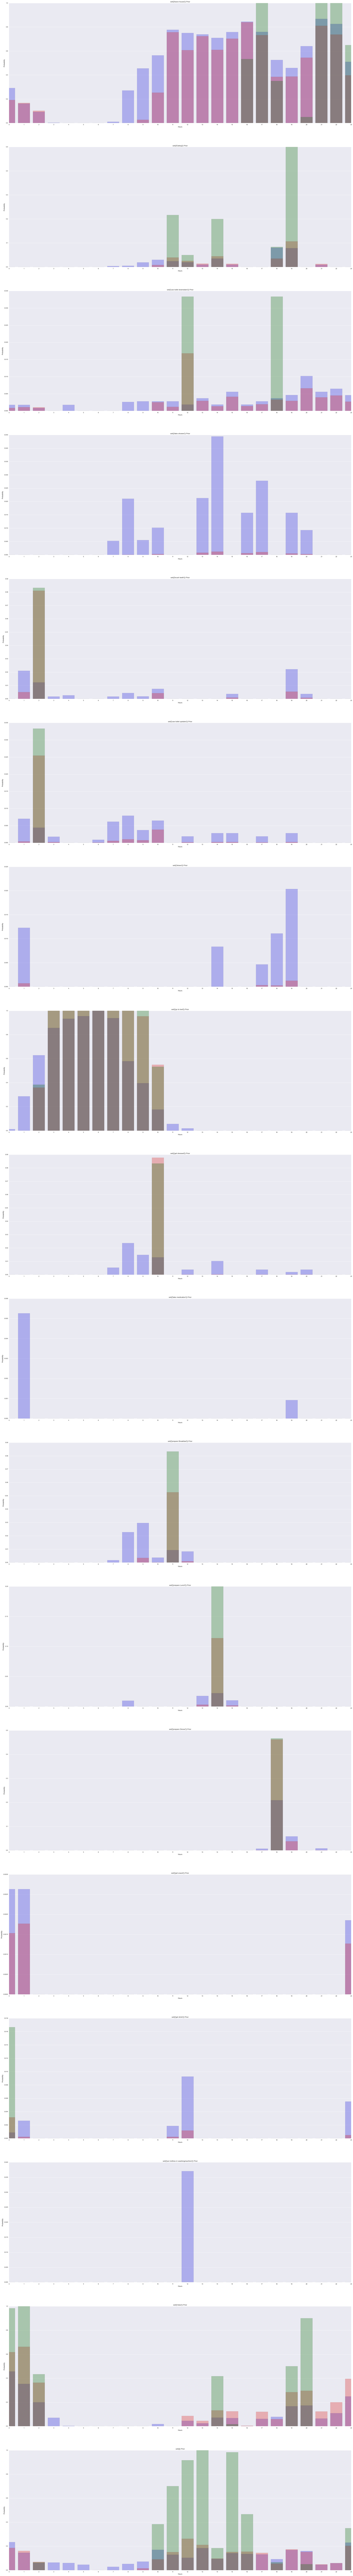

In [196]:
day1 = np.arange(24)
fig, ax = plt.subplots(num_act,1,figsize = (40,300))
zero_start = first_time_dict[0]

for i,j in i2m.iteritems():
    day_prior = priorC[:,i][zero_start:MINUTE * 24+zero_start].reshape(24,60)
    day_posterior = first_two_days_probs[:,i][zero_start:MINUTE * 24+zero_start].reshape(24,60)
    day_true = true_act[:,i][zero_start:MINUTE * 24+zero_start].reshape(24,60)
    sns.barplot(day1,np.mean(day_prior, axis = 1),color="b",alpha = 0.3,ax=ax[i],label = 'Prior')
    sns.barplot(day1,np.mean(day_posterior,axis=1), color = 'r', alpha = 0.3, ax = ax[i], label = 'Posterior')
    sns.barplot(day1,np.mean(day_true,axis=1),color = 'g', alpha = 0.3, ax = ax[i], label = 'True Activity')
    ax[i].set_xticks(np.arange(0,24,1))
    ax[i].set_xlim(0,23)
    ax[i].set_xlabel('Hours')
    ax[i].set_ylabel('Probability')
    ax[i].set_title('{} Prior'.format(j))


# Hourly Activities(Average Posterior VS Average Prior)

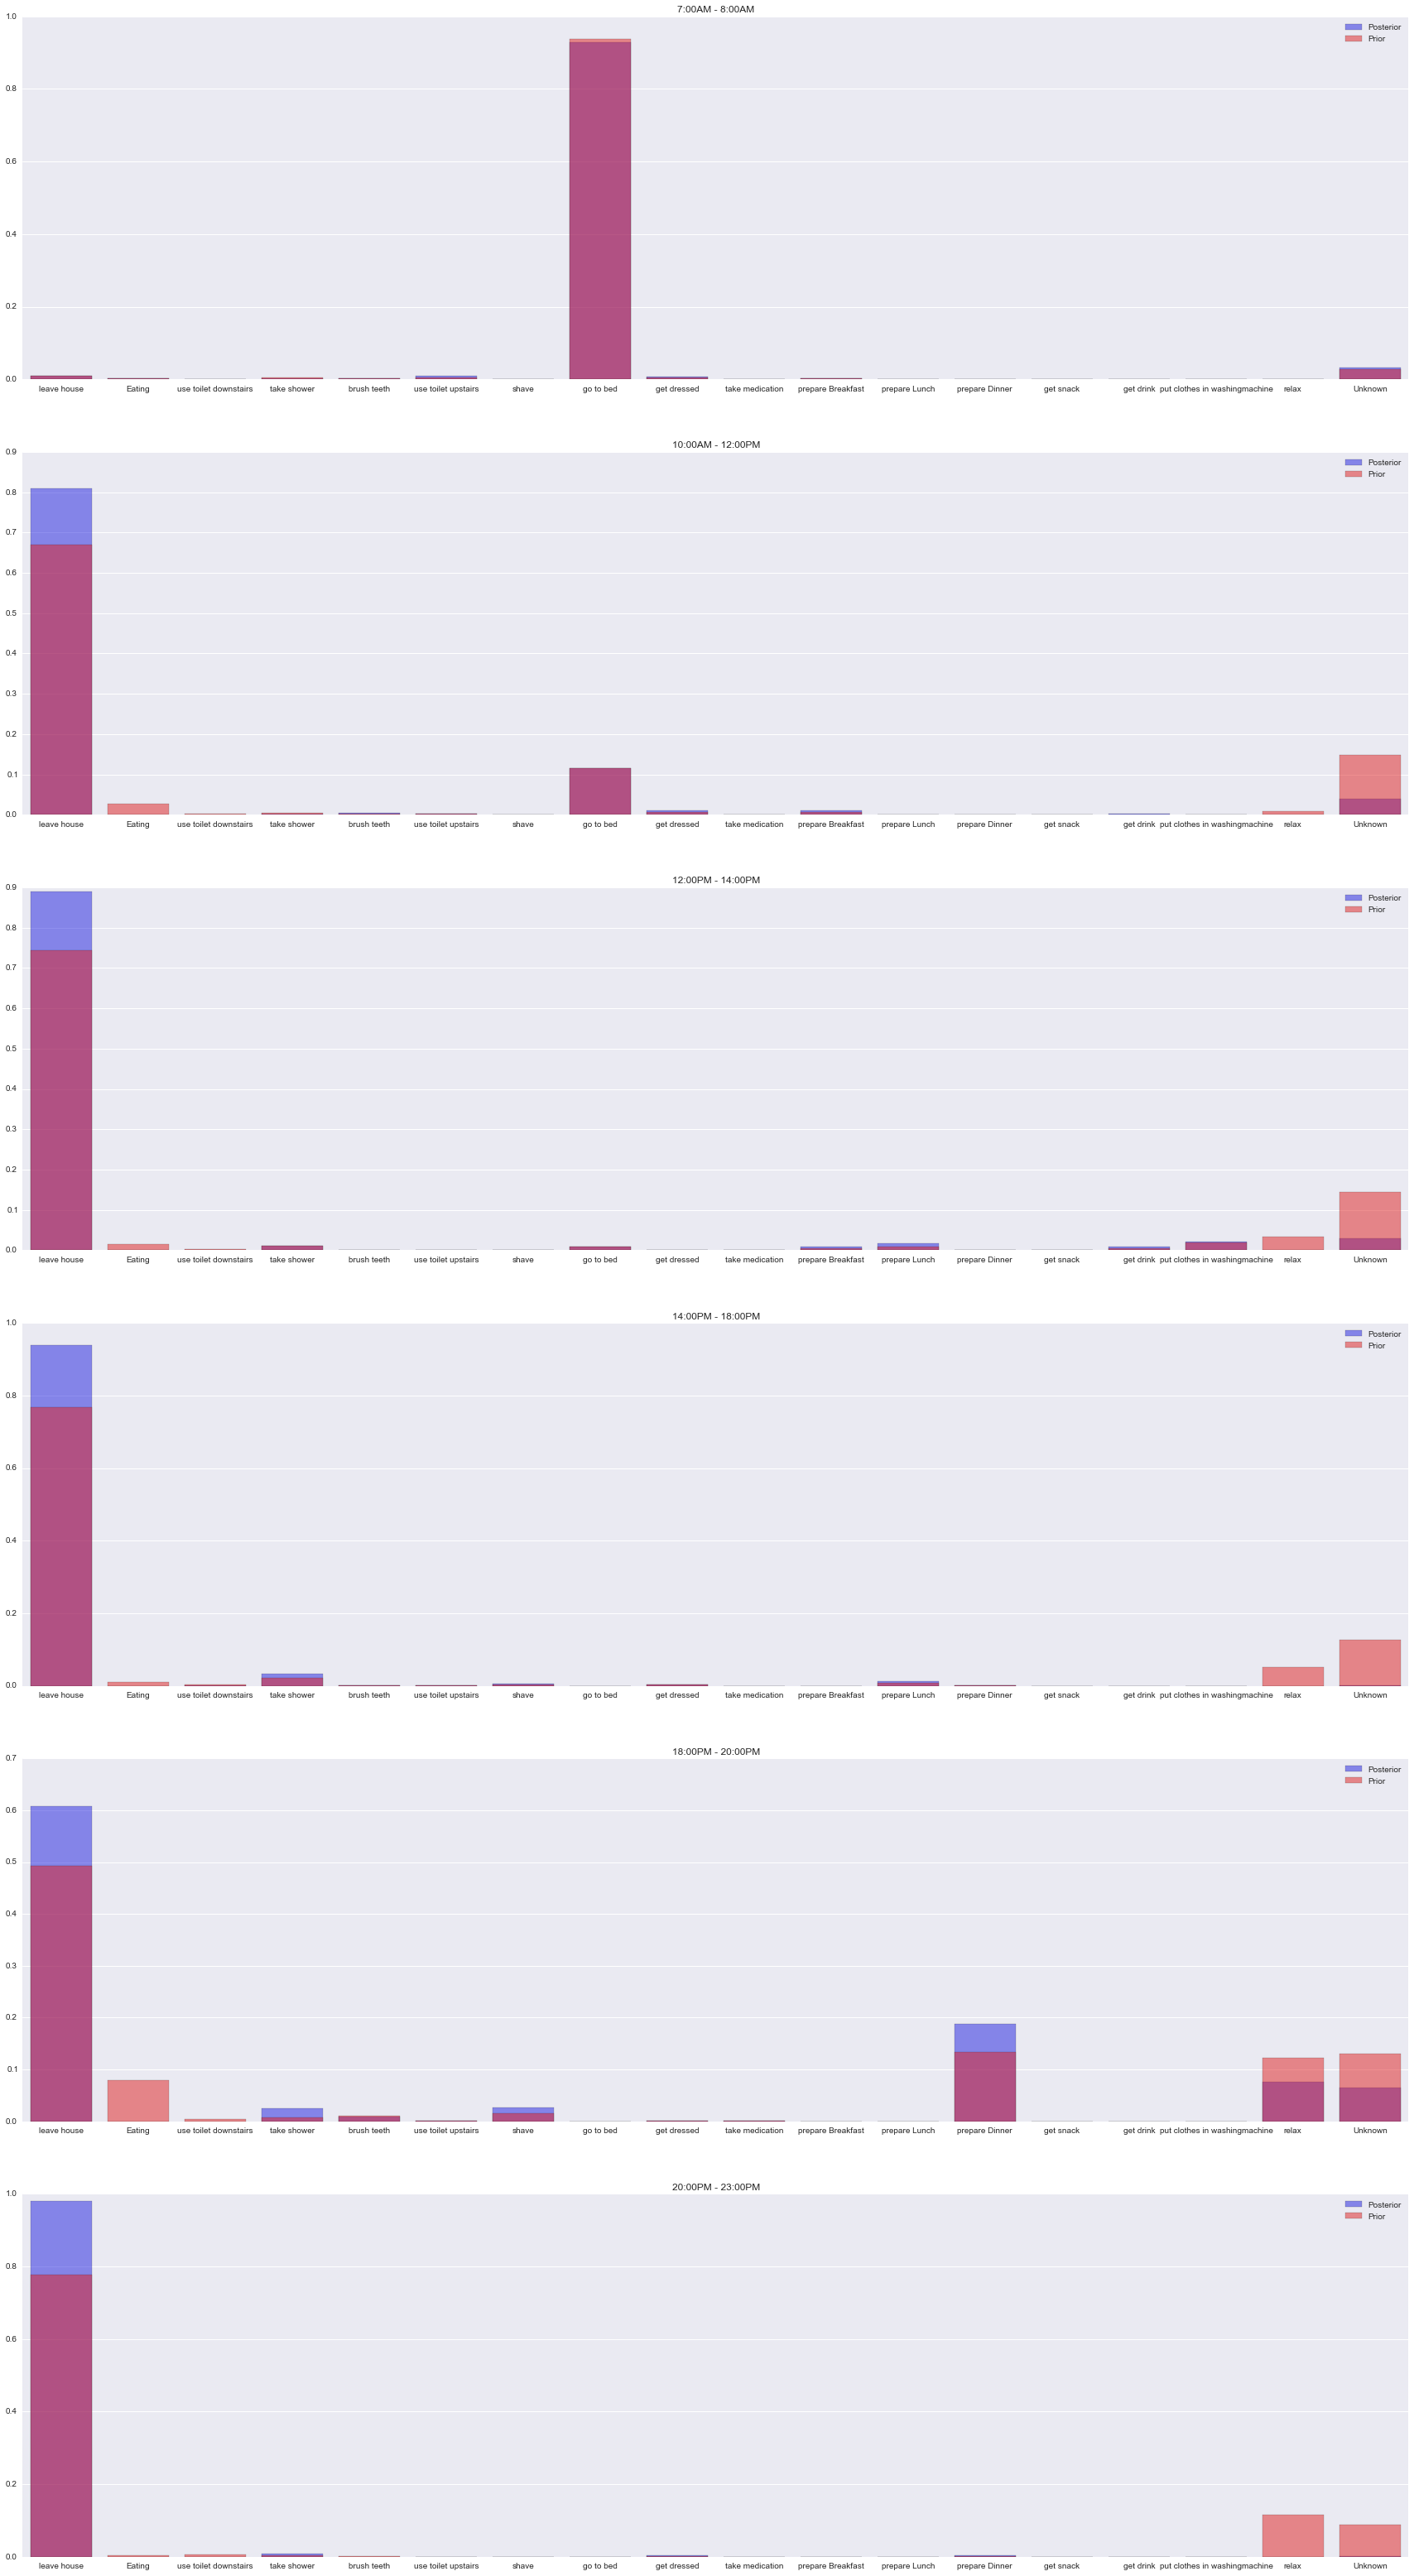

In [92]:
acts = np.arange(num_act)
fig, ax = plt.subplots(6,1,figsize = (30,55))
zero_start = first_time_dict[0]
six_am_posterior = np.mean(average_posteriorC[zero_start + 23*HOUR:zero_start + DAY + 6*HOUR], axis = 0)
sns.barplot(acts,np.mean(average_posteriorC[zero_start + 7*HOUR:zero_start + 8*HOUR], axis = 0),color='b',alpha = 0.5,ax = ax[0], label = 'Posterior')
sns.barplot(acts,np.mean(average_posteriorC[zero_start + 10*HOUR:zero_start + 12*HOUR], axis = 0),color='b',alpha = 0.5,ax = ax[1], label = 'Posterior')
sns.barplot(acts,np.mean(average_posteriorC[zero_start + 12*HOUR:zero_start + 14*HOUR], axis = 0),color='b',alpha = 0.5,ax = ax[2], label = 'Posterior')
sns.barplot(acts,np.mean(average_posteriorC[zero_start + 14*HOUR:zero_start + 18*HOUR], axis = 0),color='b',alpha = 0.5,ax = ax[3], label = 'Posterior')
sns.barplot(acts,np.mean(average_posteriorC[zero_start + 18*HOUR:zero_start + 20*HOUR], axis = 0),color='b',alpha = 0.5,ax = ax[4], label = 'Posterior')
sns.barplot(acts,np.mean(average_posteriorC[zero_start + 20*HOUR:zero_start + 23*HOUR], axis = 0),color='b',alpha = 0.5,ax = ax[5], label = 'Posterior')


six_am_prior = np.mean(priorC[zero_start + 23*HOUR:zero_start + DAY + 6*HOUR], axis = 0)
sns.barplot(acts,np.mean(priorC[zero_start + 7*HOUR:zero_start + 8*HOUR], axis = 0),color='r',alpha = 0.5,ax = ax[0], label = 'Prior')
sns.barplot(acts,np.mean(priorC[zero_start + 10*HOUR:zero_start + 12*HOUR], axis = 0),color='r',alpha = 0.5,ax = ax[1], label = 'Prior')
sns.barplot(acts,np.mean(priorC[zero_start + 12*HOUR:zero_start + 14*HOUR], axis = 0),color='r',alpha = 0.5,ax = ax[2], label = 'Prior')
sns.barplot(acts,np.mean(priorC[zero_start + 14*HOUR:zero_start + 18*HOUR], axis = 0),color='r',alpha = 0.5,ax = ax[3], label = 'Prior')
sns.barplot(acts,np.mean(priorC[zero_start + 18*HOUR:zero_start + 20*HOUR], axis = 0),color='r',alpha = 0.5,ax = ax[4], label = 'Prior')
sns.barplot(acts,np.mean(priorC[zero_start + 20*HOUR:zero_start + 23*HOUR], axis = 0),color='r',alpha = 0.5,ax = ax[5], label = 'Prior')
ticklist = []
for i in i2m.values():
    if i:
        ticklist.append(list(i)[0])
    else:
        ticklist.append('Unknown')
for i in range(6):
    ax[i].set_xticklabels(ticklist)
#ax[0].set_title('23:00PM - 6:00AM')
ax[0].set_title('7:00AM - 8:00AM')
ax[1].set_title('10:00AM - 12:00PM')
ax[2].set_title('12:00PM - 14:00PM')
ax[3].set_title('14:00PM - 18:00PM')
ax[4].set_title('18:00PM - 20:00PM')
ax[5].set_title('20:00PM - 23:00PM')
for i in range(6):
    ax[i].legend(loc = 'best')

# Daily Activities(Average Posterior VS average Prior)

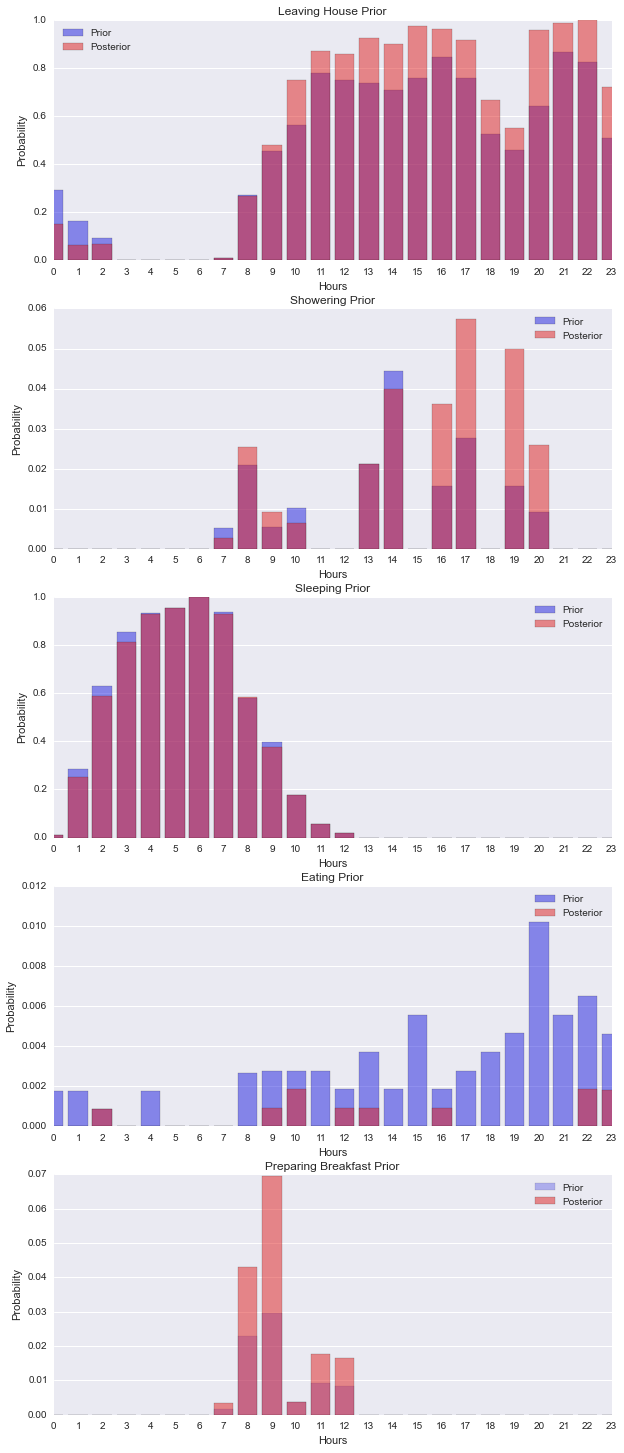

In [94]:
day1 = np.arange(24)
fig, ax = plt.subplots(5,1,figsize = (10,25))
zero_start = first_time_dict[0]
day_leaving_prior = priorC[:,0][zero_start:MINUTE * 24+zero_start].reshape(24,60)
day_leaving_posterior = average_posteriorC[:,0][zero_start:MINUTE * 24+zero_start].reshape(24,60)
sns.barplot(day1,np.mean(day_leaving_prior, axis = 1),color="b",alpha = 0.5,ax=ax[0],label = 'Prior')
sns.barplot(day1,np.mean(day_leaving_posterior,axis=1), color = 'r', alpha = 0.5, ax = ax[0], label = 'Posterior')
ax[0].set_xticks(np.arange(0,24,1))
ax[0].set_xlim(0,23)
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Probability')
ax[0].set_title('Leaving House Prior')




day_showering_prior = priorC[:,3][zero_start:MINUTE * 24+zero_start].reshape(24,60)
day_showering_posterior = average_posteriorC[:,3][zero_start:MINUTE * 24+zero_start].reshape(24,60)
sns.barplot(day1,np.mean(day_showering_prior,axis = 1),color="b",alpha = 0.5,ax = ax[1],label = 'Prior')
sns.barplot(day1,np.mean(day_showering_posterior,axis=1), color = 'r', alpha = 0.5, ax = ax[1], label = 'Posterior')
ax[1].set_xticks(np.arange(0,24,1))
ax[1].set_xlim(0,23)
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('Probability')
ax[1].set_title('Showering Prior')



day_bed_prior = priorC[:,7][zero_start:MINUTE * 24+zero_start].reshape(24,60)
day_bed_posterior = average_posteriorC[:,7][zero_start:MINUTE * 24+zero_start].reshape(24,60)

sns.barplot(day1,np.mean(day_bed_prior,axis=1),color="b",alpha = 0.5,ax = ax[2],label = 'Prior')
sns.barplot(day1, np.mean(day_bed_posterior, axis=1),color = 'r', alpha = 0.5, ax = ax[2], label = 'Posterior')
ax[2].set_xticks(np.arange(0,24,1))
ax[2].set_xlim(0,23)
ax[2].set_xlabel('Hours')
ax[2].set_ylabel('Probability')
ax[2].set_title('Sleeping Prior')




day_eat_prior = priorC[:,2][zero_start:zero_start+MINUTE * 24].reshape(24,60)
day_eat_posterior = average_posteriorC[:,2][zero_start:zero_start+MINUTE * 24].reshape(24,60)

sns.barplot(day1, np.mean(day_eat_prior,axis=1),color="b",alpha = 0.5,ax = ax[3],label = 'Prior')
sns.barplot(day1, np.mean(day_eat_posterior,axis = 1), color = 'r', alpha = 0.5, ax = ax[3], label = 'Posterior')
ax[3].set_xticks(np.arange(0,24,1))
ax[3].set_xlim(0,23)
ax[3].set_xlabel('Hours')
ax[3].set_ylabel('Probability')
ax[3].set_title('Eating Prior')




day_prepare_breakfast_prior = priorC[:,10][zero_start:zero_start+MINUTE * 24].reshape(24,60)
day_prepare_breakfast_posterior = average_posteriorC[:,10][zero_start:zero_start+MINUTE * 24].reshape(24,60)

sns.barplot(day1, np.mean(day_prepare_breakfast_prior,axis = 1), color="b", alpha = 0.3, ax = ax[4],label = 'Prior')
sns.barplot(day1, np.mean(day_prepare_breakfast_posterior, axis = 1), color = 'r', alpha = 0.5, ax = ax[4], label = 'Posterior')
ax[4].set_xticks(np.arange(0,24,1))
ax[4].set_xlim(0,23)
ax[4].set_xlabel('Hours')
ax[4].set_ylabel('Probability')
ax[4].set_title('Preparing Breakfast Prior')
for i in range(5):
    ax[i].legend(loc = 'best')